In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from IPython.display import display

print("Checking and downloading NLTK resources if necessary...")

nltk_resources = ['punkt', 'stopwords']

for resource_name in nltk_resources:
    try:
        if resource_name == 'punkt':
            nltk.data.find(f'tokenizers/{resource_name}')
        elif resource_name == 'stopwords':
            nltk.data.find(f'corpora/{resource_name}')
        print(f"NLTK resource '{resource_name}' is already downloaded.")
    except nltk.downloader.DownloadError:
        print(f"NLTK resource '{resource_name}' not found. Downloading...")
        nltk.download(resource_name, quiet=True)
        print(f"NLTK resource '{resource_name}' downloaded.")
    except Exception as e:
        print(f"An error occurred while checking/downloading NLTK resource '{resource_name}': {e}")

input_file = "../Data/Raw/data.csv"

print(f"\nAttempting to load dataset from: {input_file}")

try:
    df = pd.read_csv(input_file)
    print(f"Dataset '{input_file}' loaded successfully into a pandas DataFrame.")

    print("\n1. First 5 rows of the dataset (df.head()):")
    display(df.head())

    print("\n2. Dataset shape (df.shape):")
    print(f"   Rows: {df.shape[0]}, Columns: {df.shape[1]}")

    print("\n3. Missing values per column (df.isnull().sum()):")
    print(df.isnull().sum())

    if 'label' in df.columns:
        print("\n4. Distribution of the 'label' column (value_counts()):")
        print(df['label'].value_counts())

        print("\n5. Proportion of the 'label' column (value_counts(normalize=True)):")
        print(df['label'].value_counts(normalize=True))

        unique_labels = df['label'].unique()
        if len(unique_labels) < 2:
            print("\n   WARNING: The 'label' column has only one unique value.")
            print("            This means the dataset cannot be used as is to train a binary classifier (phishing vs. legitimate).")
            print("            Please double-check that 'data.csv' (your Enron dataset) contains both classes.")
        elif len(unique_labels) > 2:
            print("\n   WARNING: The 'label' column has more than two unique values.")
            print(f"            Unique labels found: {unique_labels}")
            print("            This project is designed for binary classification (e.g., 0 and 1).")
            print("            If these extra labels are valid, the problem might need to be redefined or data cleaned further.")
        else:
            print("\n   SUCCESS: The 'label' column appears suitable for binary classification (e.g., two unique values like 0 and 1).")

    else:
        print("\n   ERROR: The 'label' column was NOT FOUND in the dataset!")
        print(f"          Available columns are: {df.columns.tolist()}")

    print("\n6. Data types of columns (df.dtypes):")
    print(df.dtypes)

except FileNotFoundError:
    print(f"ERROR: The file '{input_file}' was not found. Please check the path and filename carefully.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

if df is not None:
    print("\n--- Initial data loading and exploration complete. ---")
else:
    print("\n--- Data loading FAILED. Please address the errors above before proceeding. ---")

Checking and downloading NLTK resources if necessary...
NLTK resource 'punkt' is already downloaded.
NLTK resource 'stopwords' is already downloaded.

Attempting to load dataset from: ../Data/Raw/data.csv
Dataset '../Data/Raw/data.csv' loaded successfully into a pandas DataFrame.

1. First 5 rows of the dataset (df.head()):


,subject,body,label
0,"hpl nom for may 25 , 2001",( see attached file : hplno 525 . xls )\r\n- h...,0
1,re : nom / actual vols for 24 th,- - - - - - - - - - - - - - - - - - - - - - fo...,0
2,"enron actuals for march 30 - april 1 , 201","estimated actuals\r\nmarch 30 , 2001\r\nno flo...",0
3,"hpl nom for may 30 , 2001",( see attached file : hplno 530 . xls )\r\n- h...,0
4,"hpl nom for june 1 , 2001",( see attached file : hplno 601 . xls )\r\n- h...,0



2. Dataset shape (df.shape):
   Rows: 29767, Columns: 3

3. Missing values per column (df.isnull().sum()):
subject    198
body         0
label        0
dtype: int64

4. Distribution of the 'label' column (value_counts()):
label
0    15791
1    13976
Name: count, dtype: int64

5. Proportion of the 'label' column (value_counts(normalize=True)):
label
0    0.530487
1    0.469513
Name: proportion, dtype: float64

   SUCCESS: The 'label' column appears suitable for binary classification (e.g., two unique values like 0 and 1).

6. Data types of columns (df.dtypes):
subject    object
body       object
label       int64
dtype: object

--- Initial data loading and exploration complete. ---


In [2]:
if df is not None:
    print("\n--- Starting Data Cleaning and Preprocessing ---")

    print("\n1. Handling missing values in 'subject' column...")
    df['subject'].fillna('', inplace=True)
    print(f"   Missing values in 'subject' after filling: {df['subject'].isnull().sum()}")

    df['body'] = df['body'].astype(str)
    df['subject'] = df['subject'].astype(str)

    print("\n2. Combining 'subject' and 'body' into a new 'text_combined' column...")
    df['text_combined'] = df['subject'] + " " + df['body']

    print("   'text_combined' column created.")
    print("\n   Showing the first 5 rows with the new 'text_combined' column (and original subject, body):")
    display(df[['subject', 'body', 'text_combined', 'label']].head())

    print("\n3.A. Converting 'text_combined' to lowercase...")
    df['text_processed'] = df['text_combined'].str.lower()
    print("   'text_combined' converted to lowercase and stored in 'text_processed'.")
    display(df[['text_combined', 'text_processed', 'label']].head())

else:
    print("DataFrame 'df' is not loaded. Cannot proceed with cleaning and preprocessing.")


--- Starting Data Cleaning and Preprocessing ---

1. Handling missing values in 'subject' column...
   Missing values in 'subject' after filling: 0

2. Combining 'subject' and 'body' into a new 'text_combined' column...
   'text_combined' column created.

   Showing the first 5 rows with the new 'text_combined' column (and original subject, body):


C:\Users\ITWORK\AppData\Local\Temp\ipykernel_26880\1820707812.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['subject'].fillna('', inplace=True)


,subject,body,text_combined,label
0,"hpl nom for may 25 , 2001",( see attached file : hplno 525 . xls )\r\n- h...,"hpl nom for may 25 , 2001 ( see attached file ...",0
1,re : nom / actual vols for 24 th,- - - - - - - - - - - - - - - - - - - - - - fo...,re : nom / actual vols for 24 th - - - - - - -...,0
2,"enron actuals for march 30 - april 1 , 201","estimated actuals\r\nmarch 30 , 2001\r\nno flo...","enron actuals for march 30 - april 1 , 201 est...",0
3,"hpl nom for may 30 , 2001",( see attached file : hplno 530 . xls )\r\n- h...,"hpl nom for may 30 , 2001 ( see attached file ...",0
4,"hpl nom for june 1 , 2001",( see attached file : hplno 601 . xls )\r\n- h...,"hpl nom for june 1 , 2001 ( see attached file ...",0



3.A. Converting 'text_combined' to lowercase...
   'text_combined' converted to lowercase and stored in 'text_processed'.


,text_combined,text_processed,label
0,"hpl nom for may 25 , 2001 ( see attached file ...","hpl nom for may 25 , 2001 ( see attached file ...",0
1,re : nom / actual vols for 24 th - - - - - - -...,re : nom / actual vols for 24 th - - - - - - -...,0
2,"enron actuals for march 30 - april 1 , 201 est...","enron actuals for march 30 - april 1 , 201 est...",0
3,"hpl nom for may 30 , 2001 ( see attached file ...","hpl nom for may 30 , 2001 ( see attached file ...",0
4,"hpl nom for june 1 , 2001 ( see attached file ...","hpl nom for june 1 , 2001 ( see attached file ...",0


In [3]:
if df is not None and 'text_processed' in df.columns:
    print("\n--- Continuing Text Preprocessing ---")

    print("\n3.B. Removing punctuation...")
    df['text_no_punct'] = df['text_processed'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
    print("   Punctuation removed and result stored in 'text_no_punct'.")
    display(df[['text_processed', 'text_no_punct', 'label']].head())

    print("\n3.C. Tokenizing text...")
    df['text_tokenized'] = df['text_no_punct'].apply(lambda x: word_tokenize(x))
    print("   Text tokenized and result (list of words) stored in 'text_tokenized'.")
    display(df[['text_no_punct', 'text_tokenized', 'label']].head())

    print("\n3.D. Removing stop words...")
    stop_words = set(stopwords.words('english'))
    df['text_no_stopwords'] = df['text_tokenized'].apply(lambda tokens: [token for token in tokens if token not in stop_words])
    print("   Stop words removed and result stored in 'text_no_stopwords'.")
    display(df[['text_tokenized', 'text_no_stopwords', 'label']].head())

    print("\nJoining tokens back into a single string per email...")
    df['text_final_processed'] = df['text_no_stopwords'].apply(lambda tokens: ' '.join(tokens))
    print("   Tokens joined into strings and stored in 'text_final_processed'.")
    display(df[['text_no_stopwords', 'text_final_processed', 'label']].head())
    print("\n--- Text preprocessing (punctuation, tokenization, stop words) complete. ---")

else:
    print("DataFrame 'df' or 'text_processed' column not found. Please ensure previous cells ran correctly.")


--- Continuing Text Preprocessing ---

3.B. Removing punctuation...


   Punctuation removed and result stored in 'text_no_punct'.


,text_processed,text_no_punct,label
0,"hpl nom for may 25 , 2001 ( see attached file ...",hpl nom for may 25 2001 see attached file h...,0
1,re : nom / actual vols for 24 th - - - - - - -...,re nom actual vols for 24 th ...,0
2,"enron actuals for march 30 - april 1 , 201 est...",enron actuals for march 30 april 1 201 estim...,0
3,"hpl nom for may 30 , 2001 ( see attached file ...",hpl nom for may 30 2001 see attached file h...,0
4,"hpl nom for june 1 , 2001 ( see attached file ...",hpl nom for june 1 2001 see attached file h...,0



3.C. Tokenizing text...
   Text tokenized and result (list of words) stored in 'text_tokenized'.


,text_no_punct,text_tokenized,label
0,hpl nom for may 25 2001 see attached file h...,"[hpl, nom, for, may, 25, 2001, see, attached, ...",0
1,re nom actual vols for 24 th ...,"[re, nom, actual, vols, for, 24, th, forwarded...",0
2,enron actuals for march 30 april 1 201 estim...,"[enron, actuals, for, march, 30, april, 1, 201...",0
3,hpl nom for may 30 2001 see attached file h...,"[hpl, nom, for, may, 30, 2001, see, attached, ...",0
4,hpl nom for june 1 2001 see attached file h...,"[hpl, nom, for, june, 1, 2001, see, attached, ...",0



3.D. Removing stop words...
   Stop words removed and result stored in 'text_no_stopwords'.


,text_tokenized,text_no_stopwords,label
0,"[hpl, nom, for, may, 25, 2001, see, attached, ...","[hpl, nom, may, 25, 2001, see, attached, file,...",0
1,"[re, nom, actual, vols, for, 24, th, forwarded...","[nom, actual, vols, 24, th, forwarded, sabrae,...",0
2,"[enron, actuals, for, march, 30, april, 1, 201...","[enron, actuals, march, 30, april, 1, 201, est...",0
3,"[hpl, nom, for, may, 30, 2001, see, attached, ...","[hpl, nom, may, 30, 2001, see, attached, file,...",0
4,"[hpl, nom, for, june, 1, 2001, see, attached, ...","[hpl, nom, june, 1, 2001, see, attached, file,...",0



Joining tokens back into a single string per email...
   Tokens joined into strings and stored in 'text_final_processed'.


,text_no_stopwords,text_final_processed,label
0,"[hpl, nom, may, 25, 2001, see, attached, file,...",hpl nom may 25 2001 see attached file hplno 52...,0
1,"[nom, actual, vols, 24, th, forwarded, sabrae,...",nom actual vols 24 th forwarded sabrae zajac h...,0
2,"[enron, actuals, march, 30, april, 1, 201, est...",enron actuals march 30 april 1 201 estimated a...,0
3,"[hpl, nom, may, 30, 2001, see, attached, file,...",hpl nom may 30 2001 see attached file hplno 53...,0
4,"[hpl, nom, june, 1, 2001, see, attached, file,...",hpl nom june 1 2001 see attached file hplno 60...,0



--- Text preprocessing (punctuation, tokenization, stop words) complete. ---


In [4]:
if df is not None and 'text_final_processed' in df.columns:
    print("\n--- Starting Feature Extraction (TF-IDF) ---")

    from sklearn.feature_extraction.text import TfidfVectorizer

    tfidf_vectorizer = TfidfVectorizer(min_df=5,
                                       max_features=5000,
                                       ngram_range=(1, 1))

    print("TfidfVectorizer initialized.")
    print(f"Parameters: min_df=5, max_features=5000, ngram_range=(1,1)")

    print("\nFitting TfidfVectorizer to the data and transforming text into TF-IDF features...")
    X = tfidf_vectorizer.fit_transform(df['text_final_processed'])

    y = df['label']

    print("TF-IDF features (X) and target variable (y) created.")

    print(f"\nShape of the TF-IDF feature matrix (X): {X.shape}")
    print(f"This means we have {X.shape[0]} emails and {X.shape[1]} features (words/terms in our vocabulary).")

    print("\n--- Feature Extraction Complete ---")
    print("We now have our features (X) and labels (y) ready for model training.")

else:
    print("DataFrame 'df' or 'text_final_processed' column not found. Please ensure previous cells ran correctly.")


--- Starting Feature Extraction (TF-IDF) ---
TfidfVectorizer initialized.
Parameters: min_df=5, max_features=5000, ngram_range=(1,1)

Fitting TfidfVectorizer to the data and transforming text into TF-IDF features...
TF-IDF features (X) and target variable (y) created.

Shape of the TF-IDF feature matrix (X): (29767, 5000)
This means we have 29767 emails and 5000 features (words/terms in our vocabulary).

--- Feature Extraction Complete ---
We now have our features (X) and labels (y) ready for model training.


In [5]:
if 'X' in locals() and 'y' in locals():
    print("\n--- Splitting Data into Training and Testing Sets ---")

    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=42,
                                                        stratify=y)

    print("Data split into training and testing sets complete.")

    print(f"\nShape of X_train (training features): {X_train.shape}")
    print(f"Shape of X_test (testing features):  {X_test.shape}")
    print(f"Shape of y_train (training labels): {y_train.shape}")
    print(f"Shape of y_test (testing labels):  {y_test.shape}")

    print(f"\nProportion of labels in y_train:\n{y_train.value_counts(normalize=True)}")
    print(f"\nProportion of labels in y_test:\n{y_test.value_counts(normalize=True)}")
    print("\n--- Data Splitting Complete ---")

else:
    print("TF-IDF features 'X' or target 'y' not found. Please ensure the TF-IDF cell ran correctly.")


--- Splitting Data into Training and Testing Sets ---
Data split into training and testing sets complete.

Shape of X_train (training features): (23813, 5000)
Shape of X_test (testing features):  (5954, 5000)
Shape of y_train (training labels): (23813,)
Shape of y_test (testing labels):  (5954,)

Proportion of labels in y_train:
label
0    0.530467
1    0.469533
Name: proportion, dtype: float64

Proportion of labels in y_test:
label
0    0.530568
1    0.469432
Name: proportion, dtype: float64

--- Data Splitting Complete ---



--- Training and Evaluating Logistic Regression Model ---
Logistic Regression model initialized.

Training the model...
Model training complete.

Making predictions on the test set...
Predictions made.

--- Model Evaluation ---
Accuracy: 0.9871
Precision (for phishing class '1'): 0.9789
Recall (for phishing class '1'):    0.9939
F1-Score (for phishing class '1'):  0.9863

Classification Report:
                precision    recall  f1-score   support

Legitimate (0)       0.99      0.98      0.99      3159
  Phishing (1)       0.98      0.99      0.99      2795

      accuracy                           0.99      5954
     macro avg       0.99      0.99      0.99      5954
  weighted avg       0.99      0.99      0.99      5954


Confusion Matrix:
[[3099   60]
 [  17 2778]]


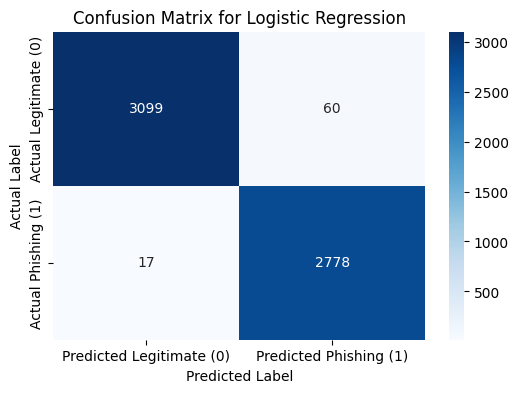


--- Model Training and Evaluation Complete ---


In [6]:
if 'X_train' in locals() and 'X_test' in locals() and 'y_train' in locals() and 'y_test' in locals():
    print("\n--- Training and Evaluating Logistic Regression Model ---")

    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import confusion_matrix, classification_report
    import matplotlib.pyplot as plt
    import seaborn as sns

    log_reg_model = LogisticRegression(solver='liblinear', random_state=42)
    print("Logistic Regression model initialized.")

    print("\nTraining the model...")
    log_reg_model.fit(X_train, y_train)
    print("Model training complete.")

    print("\nMaking predictions on the test set...")
    y_pred = log_reg_model.predict(X_test)
    print("Predictions made.")

    print("\n--- Model Evaluation ---")

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(f"Precision (for phishing class '1'): {precision:.4f}")
    print(f"Recall (for phishing class '1'):    {recall:.4f}")
    print(f"F1-Score (for phishing class '1'):  {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Legitimate (0)', 'Phishing (1)']))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    try:
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted Legitimate (0)', 'Predicted Phishing (1)'],
                    yticklabels=['Actual Legitimate (0)', 'Actual Phishing (1)'])
        plt.title('Confusion Matrix for Logistic Regression')
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.show()
    except Exception as e:
        print(f"\nCould not plot confusion matrix: {e}")
        print("Ensure matplotlib and seaborn are installed if you want to see the plot.")
        print("You can install them with: pip install matplotlib seaborn")

    print("\n--- Model Training and Evaluation Complete ---")

else:
    print("Training/testing data (X_train, X_test, y_train, y_test) not found. Please ensure the data splitting cell ran correctly.")


--- Training and Evaluating Multinomial Naive Bayes Model ---
Multinomial Naive Bayes model initialized.

Training the model...
Model training complete.

Making predictions on the test set...
Predictions made.

--- Model Evaluation (Multinomial Naive Bayes) ---
Accuracy: 0.9812
Precision (for phishing class '1'): 0.9755
Recall (for phishing class '1'):    0.9846
F1-Score (for phishing class '1'):  0.9801

Classification Report:
                precision    recall  f1-score   support

Legitimate (0)       0.99      0.98      0.98      3159
  Phishing (1)       0.98      0.98      0.98      2795

      accuracy                           0.98      5954
     macro avg       0.98      0.98      0.98      5954
  weighted avg       0.98      0.98      0.98      5954


Confusion Matrix:
[[3090   69]
 [  43 2752]]


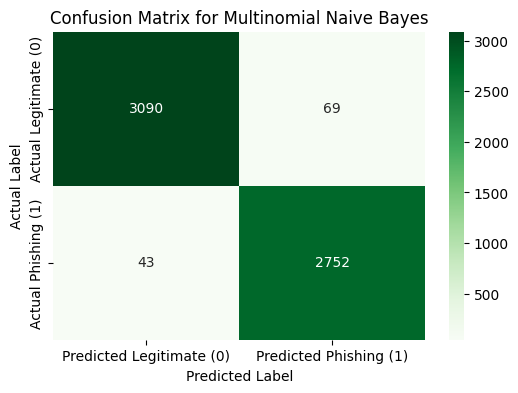


--- Multinomial Naive Bayes Model Training and Evaluation Complete ---

--- For Comparison: Previous Logistic Regression Results ---
Logistic Regression Accuracy: 0.9871
Logistic Regression Precision (Phishing '1'): 0.9789
Logistic Regression Recall (Phishing '1'):    0.9939
Logistic Regression F1-Score (Phishing '1'):  0.9863
Logistic Regression Confusion Matrix:
[[3099   60]
 [  17 2778]]


In [7]:
if 'X_train' in locals() and 'X_test' in locals() and 'y_train' in locals() and 'y_test' in locals():
    print("\n--- Training and Evaluating Multinomial Naive Bayes Model ---")

    from sklearn.naive_bayes import MultinomialNB
    

    mnb_model = MultinomialNB()
    print("Multinomial Naive Bayes model initialized.")

    print("\nTraining the model...")
    mnb_model.fit(X_train, y_train)
    print("Model training complete.")

    print("\nMaking predictions on the test set...")
    y_pred_mnb = mnb_model.predict(X_test)
    print("Predictions made.")

    print("\n--- Model Evaluation (Multinomial Naive Bayes) ---")

    accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
    print(f"Accuracy: {accuracy_mnb:.4f}")

    precision_mnb = precision_score(y_test, y_pred_mnb, pos_label=1)
    recall_mnb = recall_score(y_test, y_pred_mnb, pos_label=1)
    f1_mnb = f1_score(y_test, y_pred_mnb, pos_label=1)
    print(f"Precision (for phishing class '1'): {precision_mnb:.4f}")
    print(f"Recall (for phishing class '1'):    {recall_mnb:.4f}")
    print(f"F1-Score (for phishing class '1'):  {f1_mnb:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_mnb, target_names=['Legitimate (0)', 'Phishing (1)']))

    print("\nConfusion Matrix:")
    cm_mnb = confusion_matrix(y_test, y_pred_mnb)
    print(cm_mnb)

    try:
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Greens',
                    xticklabels=['Predicted Legitimate (0)', 'Predicted Phishing (1)'],
                    yticklabels=['Actual Legitimate (0)', 'Actual Phishing (1)'])
        plt.title('Confusion Matrix for Multinomial Naive Bayes')
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.show()
    except Exception as e:
        print(f"\nCould not plot confusion matrix: {e}")

    print("\n--- Multinomial Naive Bayes Model Training and Evaluation Complete ---")

    print("\n--- For Comparison: Previous Logistic Regression Results ---")
    print(f"Logistic Regression Accuracy: {accuracy:.4f}")
    print(f"Logistic Regression Precision (Phishing '1'): {precision:.4f}")
    print(f"Logistic Regression Recall (Phishing '1'):    {recall:.4f}")
    print(f"Logistic Regression F1-Score (Phishing '1'):  {f1:.4f}")
    print("Logistic Regression Confusion Matrix:")
    print(cm)

else:
    print("Training/testing data (X_train, X_test, y_train, y_test) not found. Please ensure the data splitting cell ran correctly.")

In [8]:
if 'y_test' in locals() and 'y_pred' in locals() and df is not None:
    print("\n--- Setting up for LLM Explanation (Real Build) ---")

    test_indices = y_test.index
    correctly_flagged_indices = test_indices[(y_test == 1) & (y_pred == 1)]

    if not correctly_flagged_indices.empty:
        example_index = correctly_flagged_indices[0]
        print(f"Selected example email with original index: {example_index}")

        example_email_subject = df.loc[example_index, 'subject']
        example_email_body = df.loc[example_index, 'body']

        print(f"\nExample Email Details (Index: {example_index}):")
        print(f"  Original Subject: {example_email_subject}")
        print(f"  Original Body (first 300 chars): {example_email_body[:300]}...")
        print("\n--- Example Email Identified ---")
    else:
        print("Could not find an example of a correctly flagged phishing email in the test set.")
        example_email_subject = "Error: No example subject found"
        example_email_body = "Error: No example body found"
else:
    print("Required variables (y_test, y_pred, df) not found. Please ensure previous cells ran correctly.")
    example_email_subject = "Error: Prerequisite variables missing"
    example_email_body = "Error: Prerequisite variables missing"


--- Setting up for LLM Explanation (Real Build) ---
Selected example email with original index: 9845

Example Email Details (Index: 9845):
  Original Subject: returned mail : see transcript for details
  Original Body (first 300 chars): the original message was received at tue , 19 jul 2005 07 : 01 : 27 - 0400 from [ 219 . 157 . 114 . 86 ] - - - - - the following addresses had permanent fatal errors - - - - - ( reason : 550 5 . 1 . 1 . . . user unknown ) - - - - - transcript of session follows - - - - - . . . while talking to intma...

--- Example Email Identified ---


In [9]:
# --- Cell for OpenAI LLM Integration ---

# AT THE VERY TOP of this cell:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
# load_dotenv() will search in the current working directory (usually project root in VS Code for notebooks)
# and its parent directories for a file named .env.
# Ensure your .env file is in the root of your 'phishing-chatbot' project.
loaded_env = load_dotenv()
if loaded_env:
    print(".env file loaded successfully.")
else:
    print("WARNING: .env file NOT found by load_dotenv(). Ensure '.env' is in your project root.")
    print(f"Current working directory for Python is: {os.getcwd()}")
    print("The script will now rely on system-level environment variables if available.")

# Initialize default message in case of errors before API call attempt
llm_response_text = "LLM call not attempted. Prerequisite variables might be missing or API key not found."

# Ensure example_email_subject and example_email_body are defined from a previous cell
if 'example_email_subject' not in locals() or not example_email_subject or example_email_subject.startswith("Error:"):
    print("Error: 'example_email_subject' not properly defined. Please run the cell that selects an example email first.")
elif 'example_email_body' not in locals() or not example_email_body or example_email_body.startswith("Error:"):
    print("Error: 'example_email_body' not properly defined. Please run the cell that selects an example email first.")
else:
    print("\n--- LLM Integration with OpenAI API ---")
    try:
        from openai import OpenAI # Import the OpenAI class
    except ImportError:
        print("The 'openai' library is not installed. Please install it in your venv and restart the kernel:")
        print("pip install openai")
        llm_response_text = "Error: OpenAI library not installed."
    else:
        OPENAI_API_KEY_FROM_ENV = os.getenv('OPENAI_API_KEY')

        if not OPENAI_API_KEY_FROM_ENV:
            print("\nCRITICAL ERROR: The OPENAI_API_KEY was NOT found after attempting to load .env file or from system environment.")
            print("Please ensure 'OPENAI_API_KEY' is defined in your .env file (in the project root),")
            print("or as a system environment variable, and that you've restarted your kernel/VS Code if needed.")
            llm_response_text = "Error: OPENAI_API_KEY not found in environment."
        else:
            # For debugging, only print a portion of the key or an indication it's found
            print(f"OPENAI_API_KEY found. Value starts with: {OPENAI_API_KEY_FROM_ENV[:10]}...")

            try:
                client = OpenAI() # Automatically uses OPENAI_API_KEY from environment
                print("OpenAI client initialized successfully.")

                # 2. Construct the Prompt Messages (using system and user roles)
                system_prompt_content = """You are an AI cybersecurity assistant integrated into a phishing detection chatbot.
Your role is to help users understand why an email might be suspicious and what actions they should take.
Structure your response clearly with distinct sections for "Suspicious Elements" and "Recommendations".
"""

                user_prompt_content = f"""An email submitted by the user has been flagged as a **potential phishing attempt** by our machine learning model.
Please analyze the following email content:

-----------------------------------
Subject: {example_email_subject}

Body:
{example_email_body}
-----------------------------------

Based on this email, please provide:
1.  A brief, user-friendly explanation of suspicious elements you can identify in the email that are common phishing indicators (e.g., sense of urgency, generic greetings, suspicious links/requests, grammar issues). Be specific to the provided email content if possible.
2.  Clear, actionable security recommendations for the user.
"""
                messages_for_llm = [
                    {"role": "system", "content": system_prompt_content},
                    {"role": "user", "content": user_prompt_content}
                ]

                # print("\nSystem Prompt (for debugging):") # Uncomment to see full prompt
                # print(system_prompt_content)
                # print("\nUser Prompt (for debugging):")   # Uncomment to see full prompt
                # print(user_prompt_content)

                # 3. Make the API Call to OpenAI
                print("\nAttempting to call OpenAI API...")
                # Recommended model for good balance of capability and cost: "gpt-3.5-turbo"
                # For higher capability (and higher cost): "gpt-4-turbo-preview" or "gpt-4"
                MODEL_NAME = "gpt-4o"

                completion = client.chat.completions.create(
                    model=MODEL_NAME,
                    messages=messages_for_llm,
                    temperature=0.7, # Controls randomness. Lower is more deterministic.
                    max_tokens=1024, # Max number of tokens to generate in the response.
                )

                llm_response_text = completion.choices[0].message.content
                print(f"OpenAI API call to '{MODEL_NAME}' successful.")

            except Exception as e:
                llm_response_text = f"An error occurred during OpenAI API interaction: {e}"
                print(llm_response_text)
                if "OPENAI_API_KEY" not in str(e).upper() and "AUTHENTICATION" not in str(e).upper() and "RATE_LIMIT" not in str(e).upper():
                     print("This might be an issue with the API call itself (e.g., model name, network, prompt format) or other configuration.")
                else:
                     print("This error might be related to your API key, OpenAI account status (e.g., quota, billing, rate limits), or permissions.")

# Display the LLM's Response (or error message)
print("\nLLM's Response (from OpenAI):")
print(llm_response_text) # This will print an error message if any step above failed

print("\n--- LLM Interaction with OpenAI Complete ---")

.env file loaded successfully.



--- LLM Integration with OpenAI API ---
OPENAI_API_KEY found. Value starts with: sk-proj-Pn...
OpenAI client initialized successfully.

Attempting to call OpenAI API...
OpenAI API call to 'gpt-4o' successful.

LLM's Response (from OpenAI):
**Suspicious Elements**

1. **Outdated Date**: The email references a date from July 2005, which is highly unusual for a current email and could indicate that the email is not legitimate or has been reused from an old phishing campaign.

2. **Technical Content**: The email contains technical jargon related to email delivery errors, which might be used to confuse recipients. This tactic can trick recipients into believing the email is legitimate and urgent, prompting them to take hasty actions.

3. **Lack of Personalization**: The email does not address the recipient by name or include any personal identifiers. Genuine emails, especially those concerning important information, typically include some form of personalization.

4. **Suspicious IP Addre

In [ ]:
import joblib
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')
joblib.dump(log_reg_model, 'log_reg_model.joblib')
print("Vectorizer and model saved!")


Vectorizer and model saved!


In [11]:
# --- Save the Trained Model and Vectorizer ---

# Ensure tfidf_vectorizer and log_reg_model are in memory from previous cells
if 'tfidf_vectorizer' in locals() and 'log_reg_model' in locals():
    import joblib # joblib is efficient for saving/loading Python objects, especially scikit-learn models

    # Define filenames for saving
    vectorizer_filename = 'tfidf_vectorizer.joblib'
    model_filename = 'log_reg_model.joblib'

    # Save the TF-IDF vectorizer
    joblib.dump(tfidf_vectorizer, vectorizer_filename)
    print(f"TF-IDF Vectorizer saved to: {vectorizer_filename}")

    # Save the Logistic Regression model
    joblib.dump(log_reg_model, model_filename)
    print(f"Logistic Regression Model saved to: {model_filename}")

    print("\nThese files should now be in the same directory as your notebook,")
    print("or you can specify a full path like 'models/tfidf_vectorizer.joblib' if you have a 'models' folder.")
    print("You will need these files for your FastAPI application.")

else:
    print("Error: 'tfidf_vectorizer' or 'log_reg_model' not found in the current session.")
    print("Please ensure you have run the cells where these were defined and trained.")

TF-IDF Vectorizer saved to: tfidf_vectorizer.joblib
Logistic Regression Model saved to: log_reg_model.joblib

These files should now be in the same directory as your notebook,
or you can specify a full path like 'models/tfidf_vectorizer.joblib' if you have a 'models' folder.
You will need these files for your FastAPI application.
